<a href="https://colab.research.google.com/github/hkafrawi/ML_Course/blob/master/Session1_Diamond_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
from statistics import mode

import random
import os

In [ ]:
#os.listdir()

In [ ]:
df = pd.read_csv('diamonds.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


 # a. Clean the Dataset

### Check for NULL Data

In [ ]:
pd.isnull(df).sum() #No Null Data in dataset

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Check for Duplicated Data

In [ ]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [ ]:
dfv2 = df.drop_duplicates().reset_index().drop(['index'],axis=1) #dfv2 stores dataset without duplicates

### Optimize Data Types for Analysis

In [ ]:
dfv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
dfv2.max()

carat           5.01
cut        Very Good
color              J
clarity         VVS2
depth           79.0
table           95.0
price          18823
x              10.74
y               58.9
z               31.8
dtype: object

In [ ]:
np.finfo(np.float16)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [ ]:
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

<span style="color:blue">
<font size='3'>
    
- Data Types for floats64 can be downcasted to float16 to increase preformance of the data (carat, depth, table, x, y, z)
    
- Data Types for price can be downcasted from int64 to int16 to increase preformance of the data
    
- Data Types for cut, color and clarity can be changed to category to increase preformance of the data
    </font></span>

In [ ]:
dfv3 = dfv2.copy(deep=True)
dfv3[['carat','depth','table','x','y','z']] = dfv3[['carat','depth','table','x','y','z']].astype('float32')
dfv3['price'] = dfv3['price'].astype('int16')
dfv3[['cut','color','clarity']] = dfv3[['cut','color','clarity']].astype('category')

In [ ]:
dfv3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53794 non-null  float32 
 1   cut      53794 non-null  category
 2   color    53794 non-null  category
 3   clarity  53794 non-null  category
 4   depth    53794 non-null  float32 
 5   table    53794 non-null  float32 
 6   price    53794 non-null  int16   
 7   x        53794 non-null  float32 
 8   y        53794 non-null  float32 
 9   z        53794 non-null  float32 
dtypes: category(3), float32(6), int16(1)
memory usage: 1.5 MB


In [ ]:
#checking if data is consistent
(dfv2['price'].sum() == dfv3['price'].sum(),
dfv2['carat'].sum() == dfv3['carat'].sum(),
dfv2['depth'].sum() == dfv3['depth'].sum(),
dfv2['table'].sum() == dfv3['table'].sum(),
dfv2['x'].sum() == dfv3['x'].sum(),
dfv2['y'].sum() == dfv3['y'].sum(),
dfv2['z'].sum() == dfv3['z'].sum())

(True, False, False, False, False, False, False)

In [ ]:
(dfv2['carat'].sum() , dfv3['carat'].sum())

(42915.78, 42915.78)

In [ ]:
dfv2['depth'].sum() , dfv3['depth'].sum()

(3321676.2, 3321676.0)

In [ ]:
dfv2['table'].sum() , dfv3['table'].sum()

(3090901.5, 3090901.2)

In [ ]:
dfv2['x'].sum() , dfv3['x'].sum()

(308304.95, 308304.97)

In [ ]:
dfv2['y'].sum() , dfv3['y'].sum()

(308489.93999999994, 308489.94)

In [ ]:
dfv2['z'].sum() , dfv3['z'].sum()

(190361.56, 190361.56)

<span style="color:blue">
<font size='3'>
    
Changing Data types of Data has significanlty reduced memory usage from 4.1mb to 1.5mb. The slight changes between the new type casted data will not affect the analysis
    </font></span>

# b. Explore the Dataset
<p>
<font size = '5'>
    
*Exploring Center, Spread, Shape and Outliers*
    
</font>
    </p>

## Center & Shape

In [ ]:
dfv3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53794 non-null  float32 
 1   cut      53794 non-null  category
 2   color    53794 non-null  category
 3   clarity  53794 non-null  category
 4   depth    53794 non-null  float32 
 5   table    53794 non-null  float32 
 6   price    53794 non-null  int16   
 7   x        53794 non-null  float32 
 8   y        53794 non-null  float32 
 9   z        53794 non-null  float32 
dtypes: category(3), float32(6), int16(1)
memory usage: 1.5 MB


In [ ]:
dfv3.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748077,57.458103,3933.065082,5.731215,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.799999,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900002,31.799999


In [ ]:
center_stat = dfv3.describe().loc[['mean','50%']]
center_stat.loc['mode'] = dfv3.mode().drop(['cut','color','clarity'],axis=1).values[0]
center_stat

,carat,depth,table,price,x,y,z
mean,0.79778,61.748077,57.458103,3933.065082,5.731215,5.734653,3.538714
50%,0.70000,61.799999,57.000000,2401.000000,5.700000,5.710000,3.530000
mode,0.30000,62.000000,56.000000,605.000000,4.370000,4.340000,2.700000


<span style="color:blue">
<font size='3'>
    
- The center of the data aids us to describe the data using one number or a very narrow range. Thus from the above table we can conclude that the average depth of a diamond ranges around 62 and the table of a diamond range from 56-57.5 (a very narrow range).
    
- Contrary to depth and table of a diamond, it is difficult to describe price, carat and the diamond's dimensions in 1 number given that the difference between mean, median and mode are significant. These factors will be further analyzed.
    </font></span>

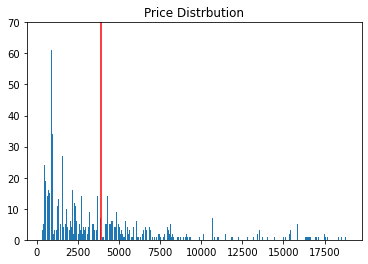

In [ ]:
diamond_price = dfv3.groupby('price').size()
plt.bar(x=diamond_price.index,
       height=diamond_price.values)
plt.ylim(0,70)
plt.axvline(x=dfv3['price'].mean(),color='red')
plt.title("Price Distrbution")
plt.show()

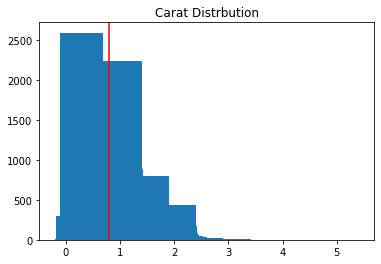

In [ ]:
diamond_carat = dfv3.groupby('carat').size()
plt.bar(x=diamond_carat.index,
       height=diamond_carat.values)
#plt.ylim(0,70)
plt.axvline(x=dfv3['carat'].mean(),color='red')
plt.title("Carat Distrbution")
plt.show()

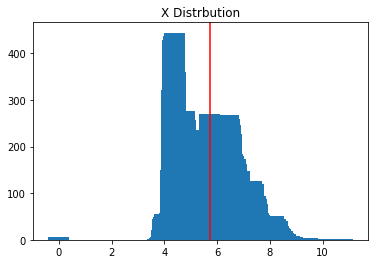

In [ ]:
diamond_x = dfv3.groupby('x').size()
plt.bar(x=diamond_x.index,
       height=diamond_x.values)
#plt.ylim(0,70)
plt.axvline(x=dfv3['x'].mean(),color='red')
plt.title("X Distrbution")
plt.show()

In [ ]:
dfv3[(dfv3['x']==0)|(dfv3['y']==0)|(dfv3['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2201,1.00,Premium,G,SI2,59.099998,59.0,3142,6.55,6.48,0.0
2308,1.01,Premium,H,I1,58.099998,59.0,3167,6.66,6.60,0.0
4778,1.10,Premium,G,SI2,63.000000,59.0,3696,6.50,6.47,0.0
5457,1.01,Premium,F,SI2,59.200001,58.0,3837,6.50,6.47,0.0
10145,1.50,Good,G,I1,64.000000,61.0,4731,7.15,7.04,0.0
11156,1.07,Ideal,F,SI2,61.599998,56.0,4954,0.00,6.62,0.0
11935,1.00,Very Good,H,VS2,63.299999,53.0,5139,0.00,0.00,0.0
13570,1.15,Ideal,G,VS2,59.200001,56.0,5564,6.88,6.83,0.0
15914,1.14,Fair,G,VS1,57.500000,67.0,6381,0.00,0.00,0.0
24338,2.18,Premium,H,SI2,59.400002,61.0,12631,8.49,8.45,0.0


In [ ]:
dfv3[(dfv3['x']==0)|(dfv3['y']==0)|(dfv3['z']==0)].count()['x']

19

<span style="color:blue">
<font size='3'>

- 19 data rows point out to dimensions of 0 in x,y and z that needed to be removed given that there is no such thing as a diamond with a 0 dimension.
    
    </font></span>

In [ ]:
xyz_drop = dfv3[(dfv3['x']==0)|(dfv3['y']==0)|(dfv3['z']==0)].index
dfv3.drop(xyz_drop, axis=0,inplace=True)

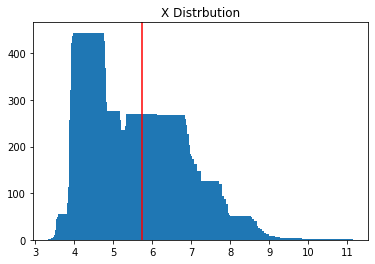

In [ ]:
diamond_x = dfv3.groupby('x').size()
plt.bar(x=diamond_x.index,
       height=diamond_x.values)
#plt.ylim(0,70)
plt.axvline(x=dfv3['x'].mean(),color='red')
plt.title("X Distrbution")
plt.show()

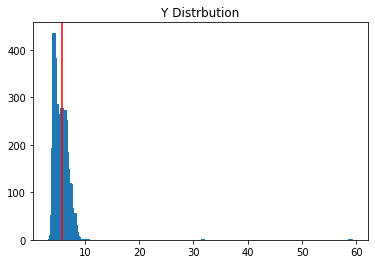

In [ ]:
diamond_y = dfv3.groupby('y').size()
plt.bar(x=diamond_y.index,
       height=diamond_y.values)
#plt.ylim(0,70)
plt.axvline(x=dfv3['y'].mean(),color='red')
plt.title("Y Distrbution")
plt.show()

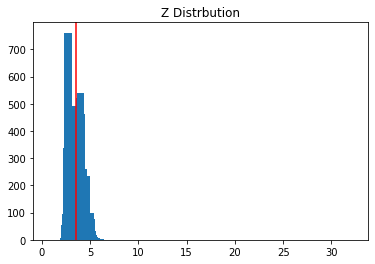

In [ ]:
diamond_z = dfv3.groupby('z').size()
plt.bar(x=diamond_z.index,
       height=diamond_z.values)
#plt.ylim(0,70)
plt.axvline(x=dfv3['z'].mean(),color='red')
plt.title("Z Distrbution")
plt.show()

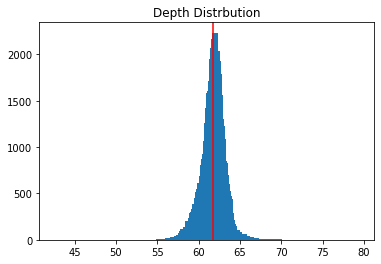

In [ ]:
diamond_depth = dfv3.groupby('depth').size()
plt.bar(x=diamond_depth.index,
       height=diamond_depth.values)
#plt.ylim(0,70)
plt.axvline(x=dfv3['depth'].mean(),color='red')
plt.title("Depth Distrbution")
plt.show()

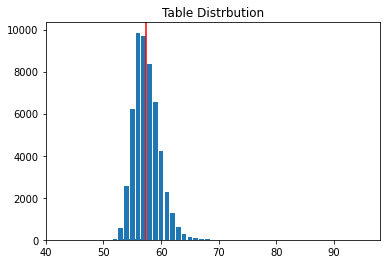

In [ ]:
diamond_table = dfv3.groupby('table').size()
plt.bar(x=diamond_table.index,
       height=diamond_table.values)
#plt.ylim(0,70)
plt.axvline(x=dfv3['table'].mean(),color='red')
plt.title("Table Distrbution")
plt.show()

<span style="color:blue">
    <font size='3'>
        
- The shape of Price, Carat and diamond dimensions data is right skewed given that the mean of the data is  larger than the median. This could indicate that the mean cannot successfully describe the dataset and that the mean is greater than the 'regular' behaviour of the data. A look at the datas spread can provide further insight
        
- Furthermore, Based on analysis of the shape of the data, outliers are evident that need to be removed
    </font></span>

## Outliers

In [ ]:
dfv3[(dfv3['y']>15)|
     (dfv3['table']>70)|
     (dfv3['z']>10)|
    (dfv3['depth']<52)]

,carat,cut,color,clarity,depth,table,price,x,y,z
4506,1.00,Fair,G,SI1,43.000000,59.000000,3634,6.32,6.270000,3.970000
6325,1.00,Fair,G,VS2,44.000000,53.000000,4032,6.31,6.240000,4.120000
10353,1.09,Ideal,J,VS2,43.000000,54.000000,4778,6.53,6.550000,4.120000
16819,1.43,Fair,I,VS1,50.799999,60.000000,6727,7.73,7.250000,3.930000
24012,2.00,Premium,H,SI2,58.900002,57.000000,12210,8.09,58.900002,8.060000
24875,2.01,Fair,F,SI1,58.599998,95.000000,13387,8.32,8.310000,4.870000
36399,0.30,Fair,E,VVS2,51.000000,67.000000,945,4.67,4.620000,2.370000
44801,0.68,Fair,G,SI1,58.000000,71.000000,1633,5.85,5.700000,3.350000
48268,0.51,Very Good,E,VS1,61.799999,54.700001,1970,5.12,5.150000,31.799999
49047,0.51,Ideal,E,VS1,61.799999,55.000000,2075,5.15,31.799999,5.120000


In [ ]:
outliers_drop = dfv3[(dfv3['y']>15)|
     (dfv3['table']>70)|
     (dfv3['z']>10)|
    (dfv3['depth']<52)].index
dfv3.drop(outliers_drop, axis=0,inplace=True)

<span style="color:blue">
    <font size='3'>
        
- 15 data points removed given that they are outliers from the datasets.
    </font></span>

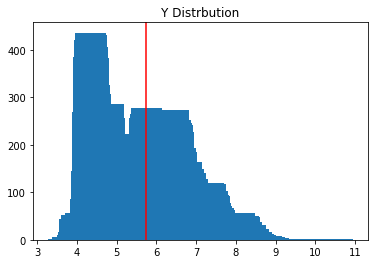

In [ ]:
diamond_y = dfv3.groupby('y').size()
plt.bar(x=diamond_y.index,
       height=diamond_y.values)
#plt.ylim(0,70)
plt.axvline(x=dfv3['y'].mean(),color='red')
plt.title("Y Distrbution")
plt.show()

## Spread

In [ ]:
dfv3.describe().loc[['std','min','25%','50%','75%','max']]

,carat,depth,table,price,x,y,z
std,0.473156,1.418847,2.219905,3986.006205,1.1186,1.11052,0.691084
min,0.200000,52.200001,43.000000,326.000000,3.7300,3.68000,1.070000
25%,0.400000,61.000000,56.000000,950.000000,4.7100,4.72000,2.910000
50%,0.700000,61.799999,57.000000,2401.000000,5.7000,5.71000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.5400,6.54000,4.030000
max,5.010000,78.199997,70.000000,18823.000000,10.7400,10.54000,6.980000


<span style="color:blue">
    <font size='3'>
        
- As previously noted, price's standard deviation is high indicating that the data is more spread out of the center.
    </font></span>

# c. Insights

## Adding New Columns to treat Ordinal Categorical columns as discreet columns

In [ ]:
cut_dict = {'Ideal':5,
           'Premium':4,
           'Very Good':3,
           'Good':2,
           "Fair":1}

In [ ]:
dfv3['cut_numerical'] = dfv3['cut'].apply(lambda x: cut_dict[x])

In [ ]:
dfv3.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_numerical
0,0.23,Ideal,E,SI2,61.500000,55.0,326,3.95,3.98,2.43,5
1,0.21,Premium,E,SI1,59.799999,61.0,326,3.89,3.84,2.31,4
2,0.23,Good,E,VS1,56.900002,65.0,327,4.05,4.07,2.31,2
3,0.29,Premium,I,VS2,62.400002,58.0,334,4.20,4.23,2.63,4
4,0.31,Good,J,SI2,63.299999,58.0,335,4.34,4.35,2.75,2


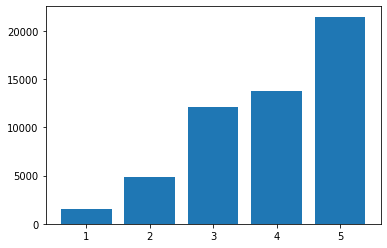

In [ ]:
diamond_cut = dfv3.groupby('cut_numerical').size()
plt.bar(x=diamond_cut.index,
       height=diamond_cut.values)
#plt.ylim(0,70)
#plt.axvline(x=dfv3['price'].mean(),color='red')
plt.show()

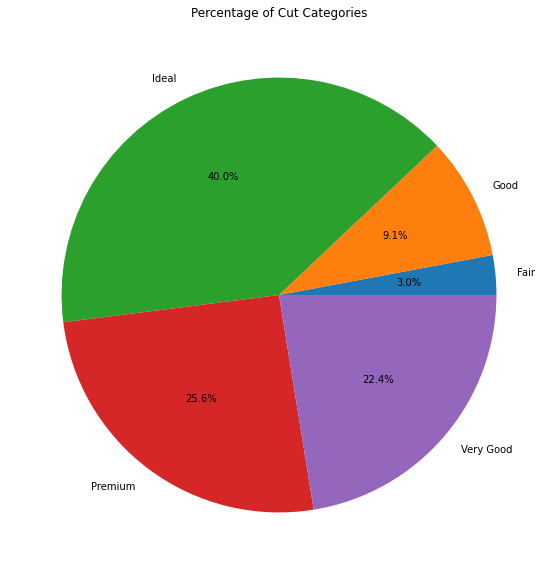

In [ ]:
diamond_cut = dfv3.groupby('cut').size()
plt.figure(figsize=(10,10))
plt.pie(diamond_cut,labels=diamond_cut.index,autopct='%1.1f%%')
plt.title("Percentage of Cut Categories")
plt.savefig('cut.jpg')
plt.show()

In [ ]:
color_dict = {'J':1,
             'I':2,
             'H':3,
             'G':4,
             'F':5,
             'E':6,
             'D':7}

In [ ]:
dfv3['color_numerical'] = dfv3['color'].apply(lambda x:color_dict[x])

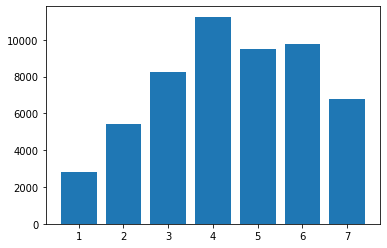

In [ ]:
diamond_color = dfv3.groupby('color_numerical').size()
plt.bar(x=diamond_color.index,
       height=diamond_color.values)
#plt.ylim(0,70)
#plt.axvline(x=dfv3['price'].mean(),color='red')
plt.show()

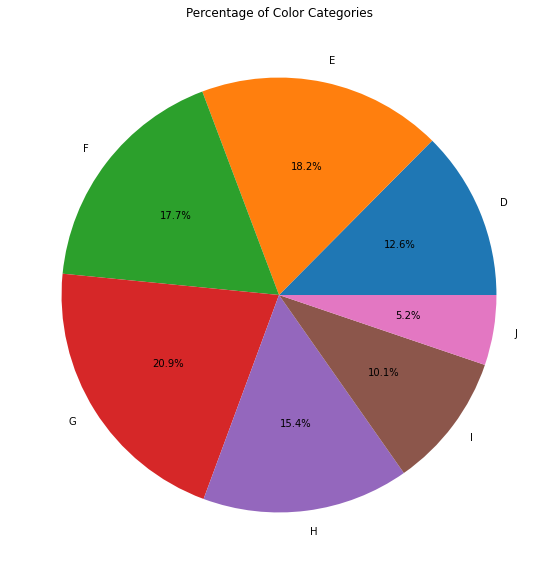

In [ ]:
diamond_color = dfv3.groupby('color').size()
plt.figure(figsize=(10,10))
plt.pie(diamond_color,labels=diamond_color.index,autopct='%1.1f%%')
plt.title("Percentage of Color Categories")
plt.savefig('color.jpg')
plt.show()

In [ ]:
clarity_dict = {'I1':1,
               'SI2':2,
               'SI1':3,
               'VS2':4,
               'VS1':5,
               'VVS2':6,
               'VVS1':7,
               'IF':8}


In [ ]:
dfv3['clarity_numerical'] = dfv3['clarity'].apply(lambda x:clarity_dict[x])

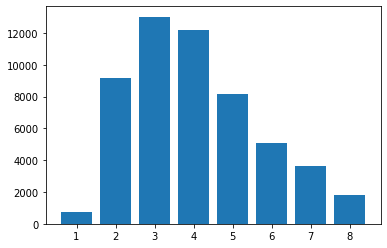

In [ ]:
diamond_clarity = dfv3.groupby('clarity_numerical').size()
plt.bar(x=diamond_clarity.index,
       height=diamond_clarity.values)
#plt.ylim(0,70)
#plt.axvline(x=dfv3['price'].mean(),color='red')
plt.show()

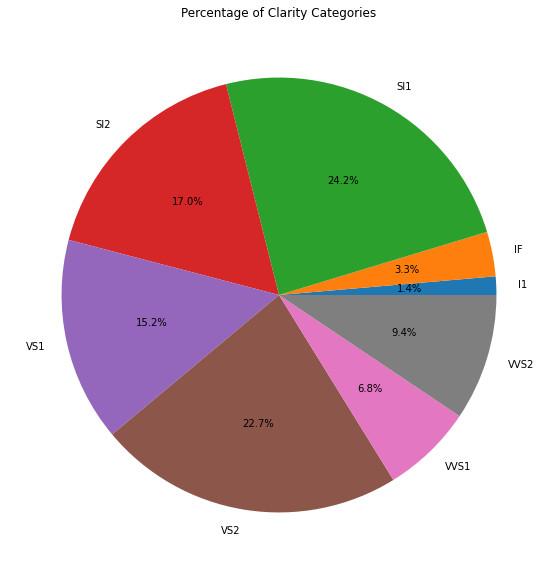

In [ ]:
diamond_clarity = dfv3.groupby('clarity').size()
plt.figure(figsize=(10,10))
plt.pie(diamond_clarity,labels=diamond_clarity.index,autopct='%1.1f%%')
plt.title("Percentage of Clarity Categories")
plt.savefig('clarity.jpg')
plt.show()

In [ ]:
dfv3.loc[:,['cut_numerical','color_numerical','clarity_numerical']] = dfv3.loc[:,['cut_numerical','color_numerical','clarity_numerical']].astype('int16')

In [ ]:
center_stat = dfv3.describe().loc[:,['cut_numerical','color_numerical','clarity_numerical']]
center_stat.loc['mode'] = dfv3[['cut_numerical','color_numerical','clarity_numerical']].mode().values[0]
center_stat

,cut_numerical,color_numerical,clarity_numerical
count,53760.000000,53760.000000,53760.000000
mean,3.904799,4.406269,4.052418
std,1.115452,1.701292,1.646848
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000
75%,5.000000,6.000000,5.000000
max,5.000000,7.000000,8.000000
mode,5.000000,4.000000,3.000000


# d. Regression Analysis

### Identifying possible relationships

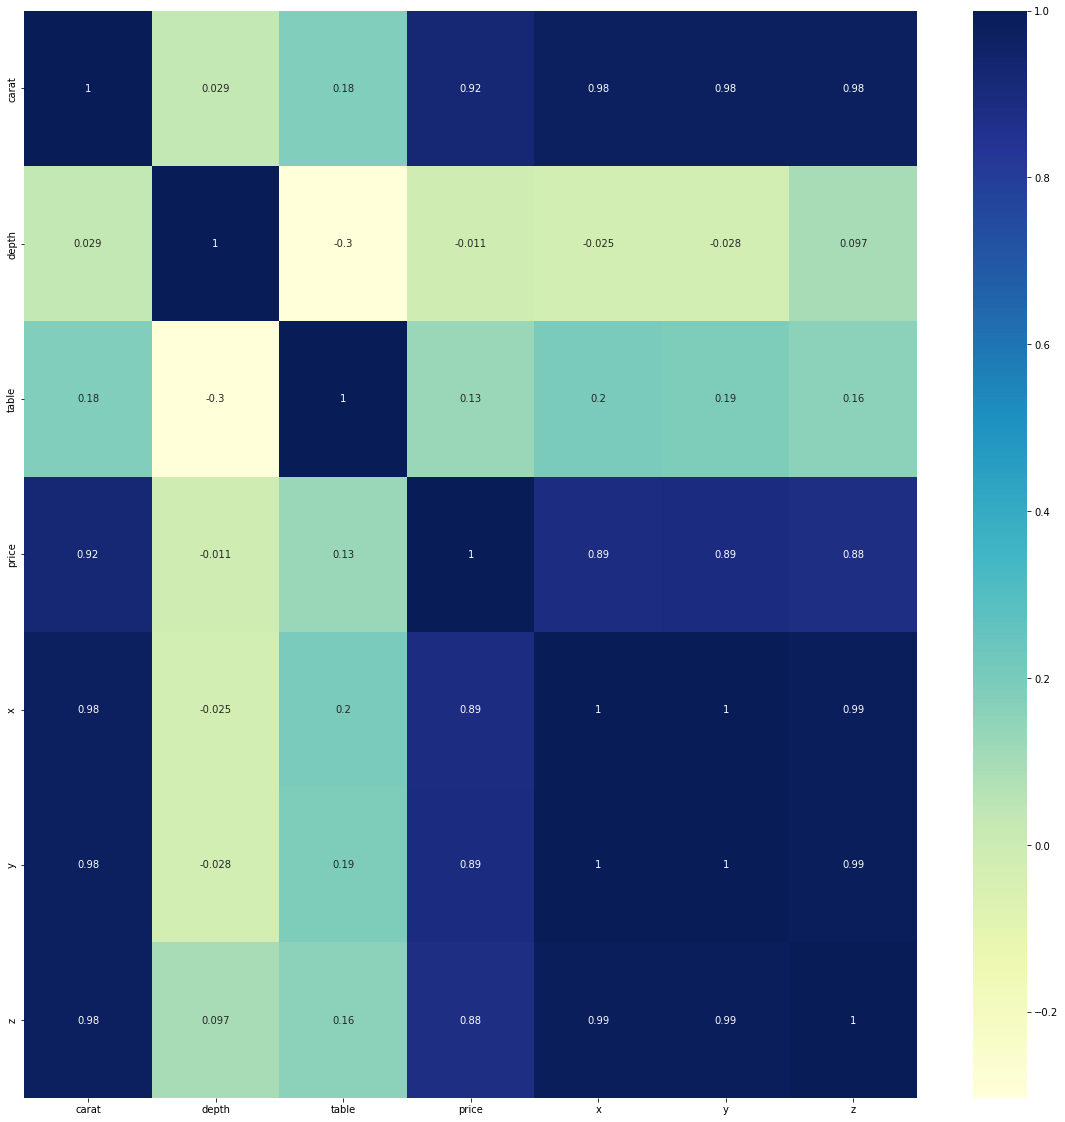

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(dfv3.iloc[:,:10].corr(),cmap="YlGnBu",annot=True)
plt.savefig("corr.jpg")
plt.show()

In [ ]:
dfv3.iloc[:,:10].head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.500000,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.799999,61.0,326,3.89,3.84,2.31


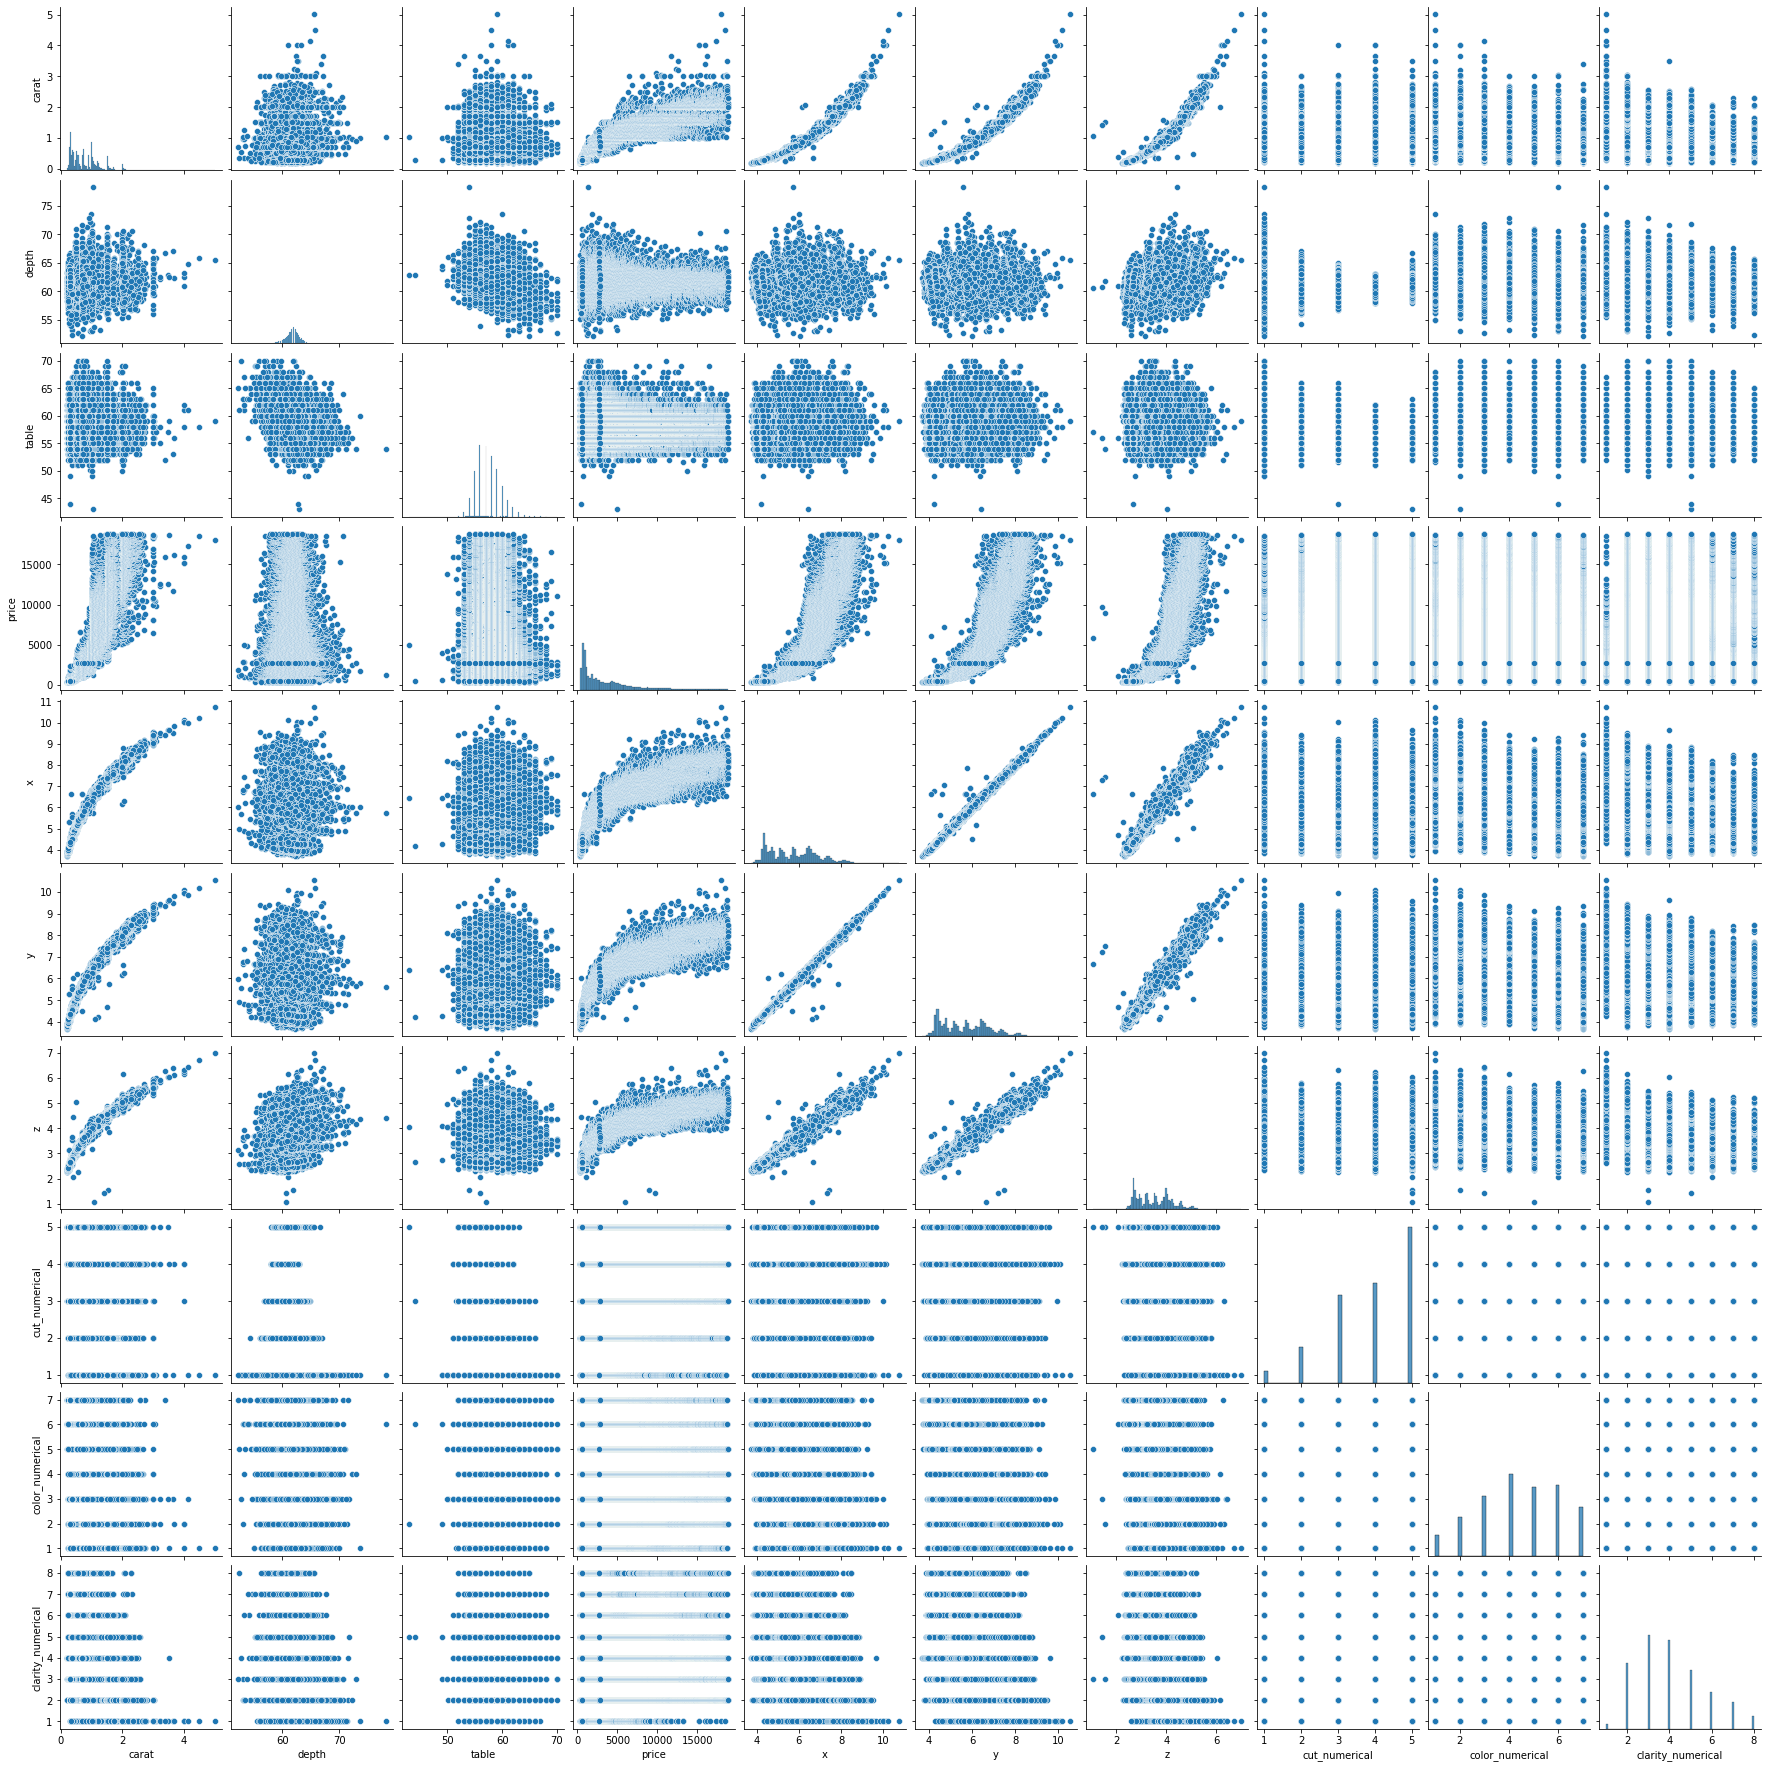

In [ ]:
sns.pairplot(dfv3)

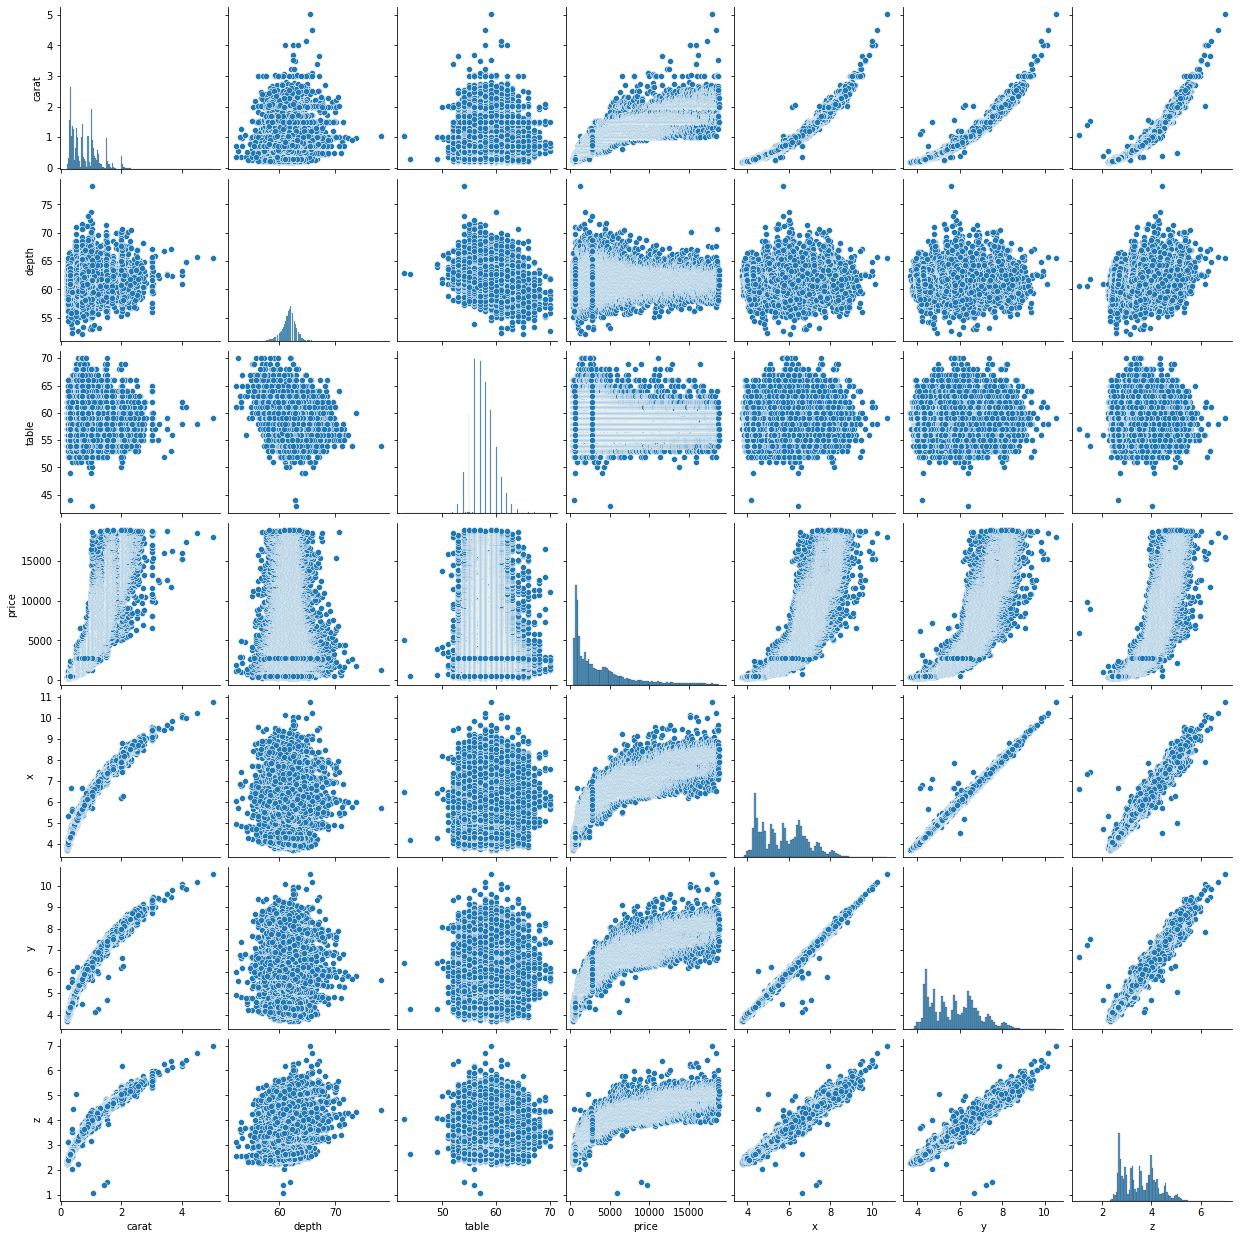

In [ ]:
sns.pairplot(dfv3.iloc[:,:10])

In [ ]:
dfv3.groupby('cut').agg(['count',np.mean,mode, np.median, max, min])[['price','carat']]

/var/folders/s0/8q57c1710898v6nc8z1kpyrr0000gn/T/ipykernel_2997/3100755243.py:1: FutureWarning: ['color', 'clarity'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  dfv3.groupby('cut').agg(['count',np.mean,mode, np.median, max, min])[['price','carat']]


price                                         carat            \
           count         mean  mode  median    max  min  count      mean   
cut                                                                        
Fair        1586  4344.258512  2964  3282.0  18574  337   1586  1.044653   
Good        4888  3916.279051   544  3038.0  18707  327   4888  0.846710   
Ideal      21483  3462.151469   828  1813.0  18806  326  21483  0.703385   
Premium    13736  4578.358256   802  3177.5  18823  326  13736  0.890991   
Very Good  12067  3981.086848   552  2647.0  18818  336  12067  0.806204   

                                    
           mode median   max   min  
cut                                 
Fair       1.00   1.00  5.01  0.22  
Good       1.01   0.82  3.01  0.23  
Ideal      0.30   0.54  3.50  0.20  
Premium    1.01   0.85  4.01  0.20  
Very Good  1.01   0.71  4.00  0.20

In [ ]:
dfv3.groupby('color').agg(['count',np.mean,mode, np.median, max, min])[['price','carat']]

/var/folders/s0/8q57c1710898v6nc8z1kpyrr0000gn/T/ipykernel_2997/44483553.py:1: FutureWarning: ['cut', 'clarity'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  dfv3.groupby('color').agg(['count',np.mean,mode, np.median, max, min])[['price','carat']]


price                                        carat                  \
       count         mean mode  median    max  min  count      mean  mode   
color                                                                       
D       6753  3172.707685  710  1842.0  18693  357   6753  0.658227  0.30   
E       9772  3080.094044  844  1740.0  18731  326   9772  0.658040  0.30   
F       9515  3725.911403  802  2345.0  18791  342   9515  0.736461  1.01   
G      11250  3999.473867  605  2241.5  18818  354  11250  0.770777  0.30   
H       8264  4476.455106  628  3447.0  18803  337   8264  0.910294  0.30   
I       5405  5079.538390  608  3720.0  18823  334   5405  1.024895  0.30   
J       2801  5326.611210  506  4234.0  18710  335   2801  1.162867  1.51   

                          
      median   max   min  
color                     
D       0.53  3.40  0.20  
E       0.53  3.05  0.20  
F       0.70  3.01  0.20  
G       0.70  3.01  0.23  
H       0.90  4.13  0.23  
I       1.00  4.01  0.23  
J       1.11  5.01  0.23

In [ ]:
dfv3.groupby('clarity').agg(['count',np.mean,mode, np.median, max, min])[['price','carat']]

/var/folders/s0/8q57c1710898v6nc8z1kpyrr0000gn/T/ipykernel_2997/4104617821.py:1: FutureWarning: ['cut', 'color'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  dfv3.groupby('clarity').agg(['count',np.mean,mode, np.median, max, min])[['price','carat']]


price                                        carat                  \
         count         mean mode  median    max  min  count      mean  mode   
clarity                                                                       
I1         737  3927.303935  956  3348.0  18531  345    737  1.283826  0.70   
IF        1784  2870.569507  891  1080.0  18806  369   1784  0.505645  0.31   
SI1      13026  3993.884999  756  2822.0  18818  326  13026  0.850113  1.01   
SI2       9140  5054.047484  574  4071.5  18804  326   9140  1.075946  1.01   
VS1       8151  3841.605815  605  2008.0  18795  327   8151  0.727356  0.30   
VS2      12221  3925.773996  658  2056.0  18823  334  12221  0.764037  0.31   
VVS1      3646  2522.993692  789  1094.0  18777  336   3646  0.503505  0.30   
VVS2      5055  3286.995648  684  1316.0  18768  336   5055  0.596586  0.30   

                            
        median   max   min  
clarity                     
I1        1.11  5.01  0.30  
IF        0.35  2.29  0.23  
SI1       0.76  2.57  0.21  
SI2       1.01  3.04  0.20  
VS1       0.57  2.59  0.23  
VS2       0.63  3.51  0.20  
VVS1      0.39  2.31  0.23  
VVS2      0.44  2.07  0.23

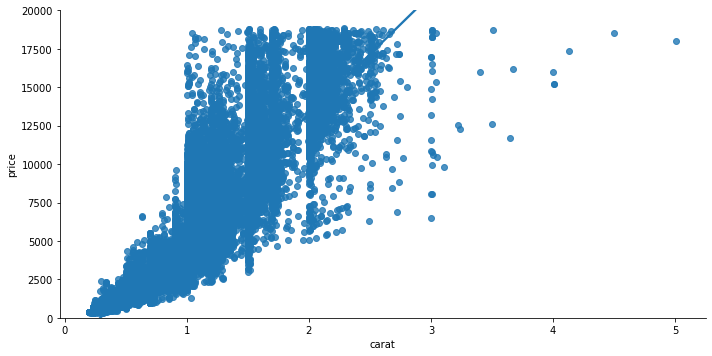

In [ ]:
sns.lmplot(data=dfv3, x='carat', y='price',height=5,aspect=2)
plt.ylim(0,20000)
plt.savefig('carat.jpg')
plt.show()

In [ ]:
dfv3['price'].mean(), dfv3['price'].quantile(.75),dfv3['price'].quantile(.25)

(3931.1434151785716, 5324.0, 950.0)

In [ ]:
new_dfv3 = dfv3[(dfv3['price']>dfv3['price'].quantile(.25))&
               (dfv3['price']<dfv3['price'].quantile(.75))]

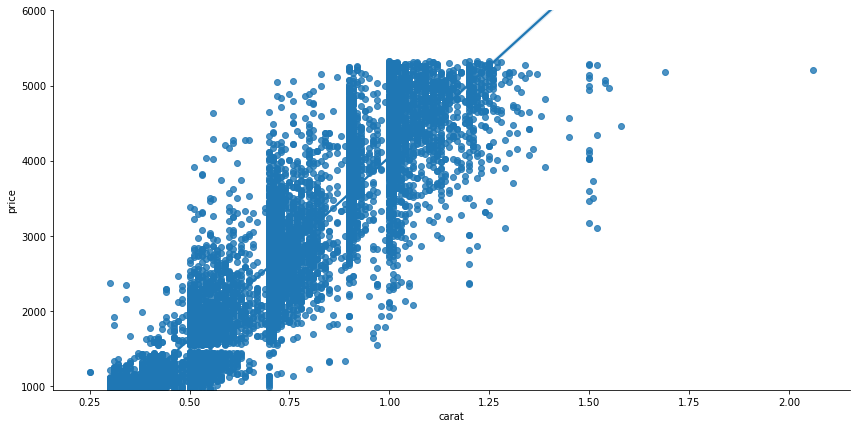

In [ ]:
sns.lmplot(data=new_dfv3.sample(10_000), x='carat', y='price',height=6,aspect=2)
plt.ylim(new_dfv3['price'].min(),6000)
plt.show()

In [ ]:
new2_dfv3 = dfv3.groupby('carat').agg({'price':['mean','count']})['price']
v = new2_dfv3[new2_dfv3['count']>10].index
dfv3['checker'] = dfv3['carat'].apply(lambda x: x in v)

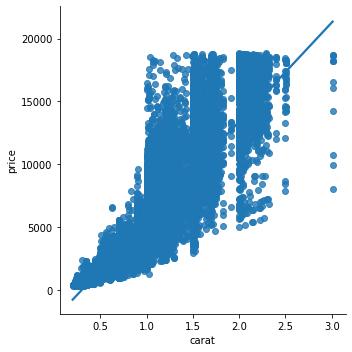

In [ ]:
sns.lmplot(data=dfv3[dfv3['checker'] == True], x='carat', y='price')
# plt.ylim(new_dfv3['price'].min(),6000)
plt.show()

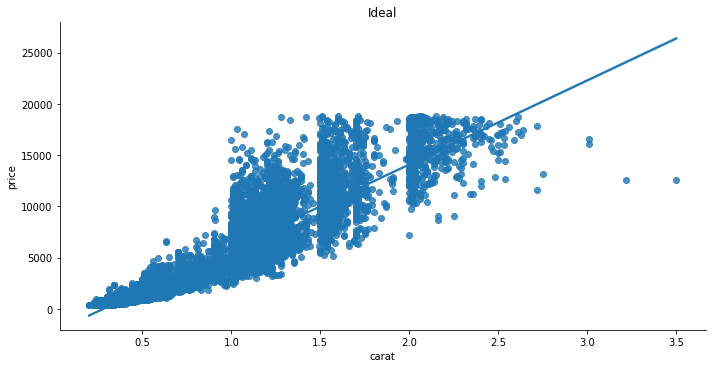

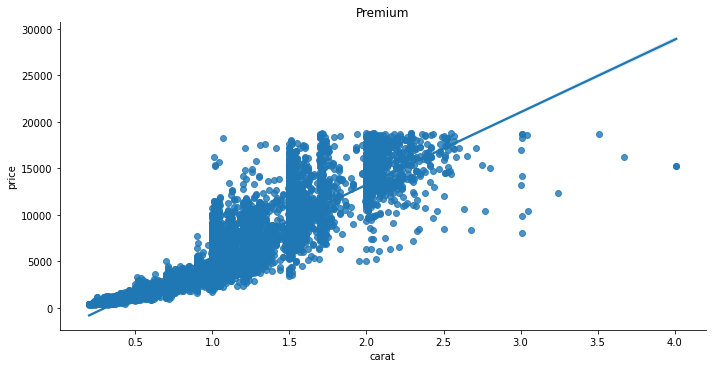

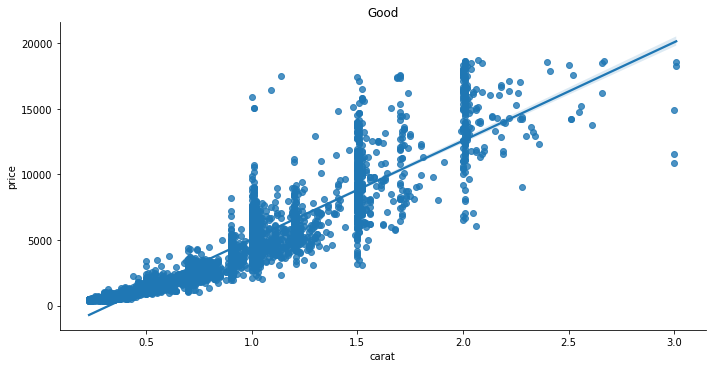

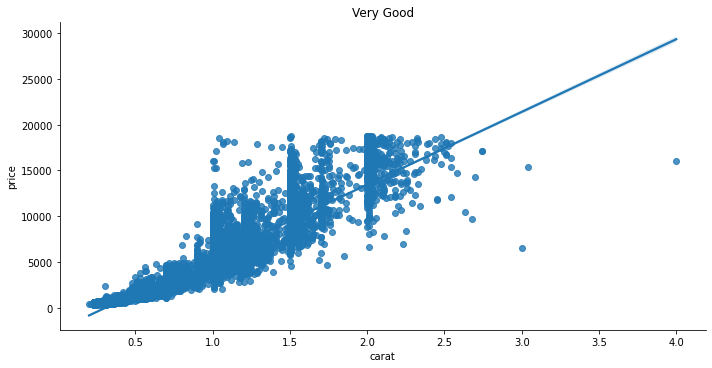

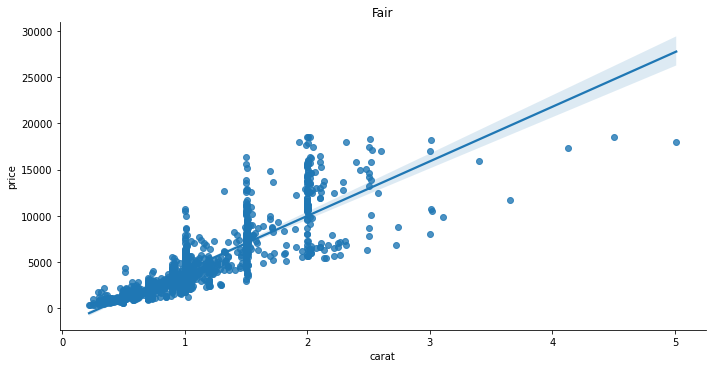

In [ ]:
#plt.figure(figsize=(20,20))

for cut in dfv3['cut'].unique():
    sns.lmplot(data=dfv3[dfv3['cut']==cut], x='carat', y='price', height=5,aspect=2)
    plt.title(f'{cut}')
    plt.show()

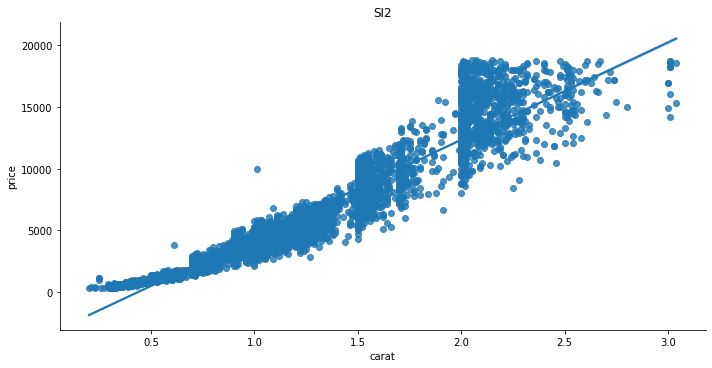

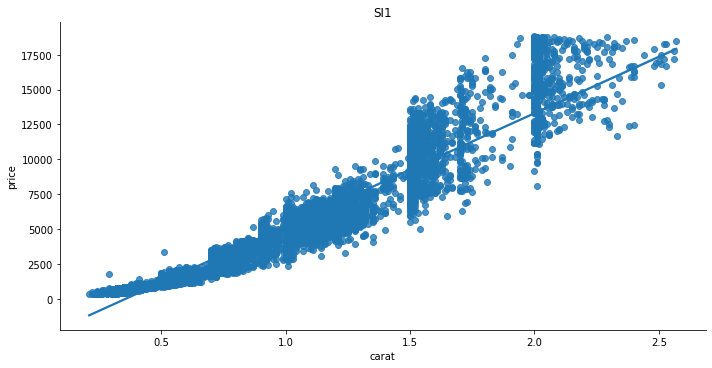

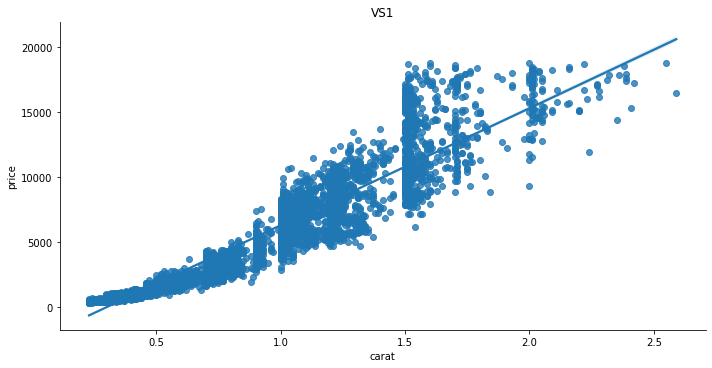

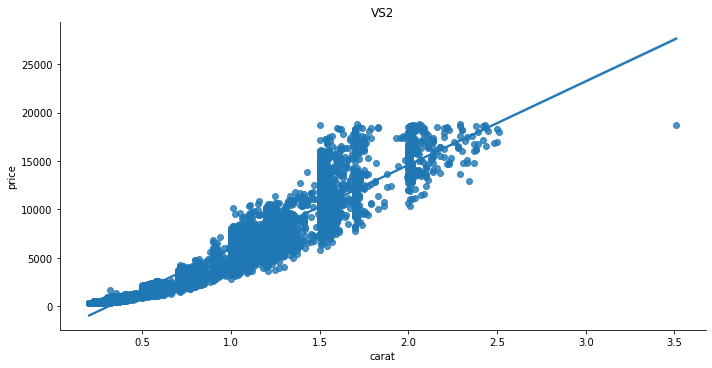

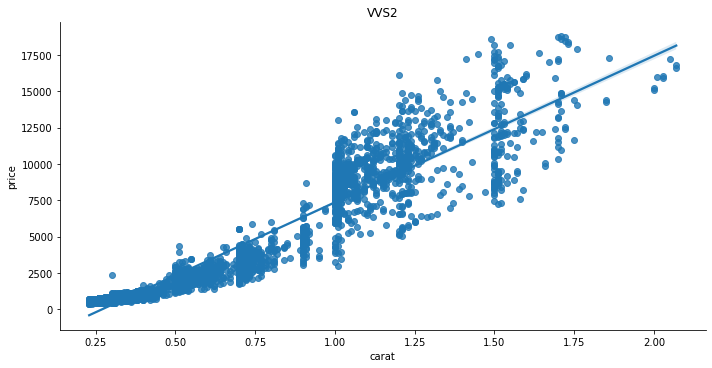

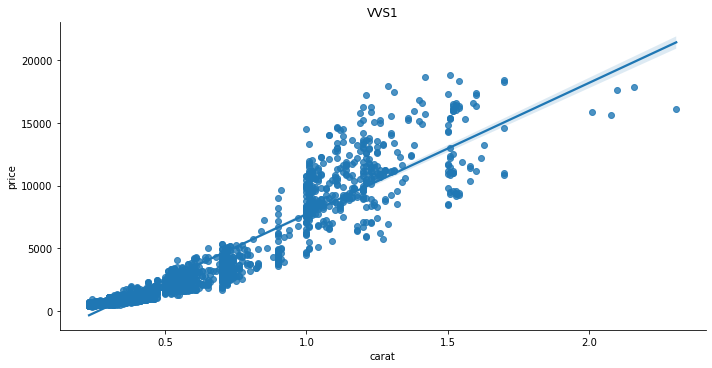

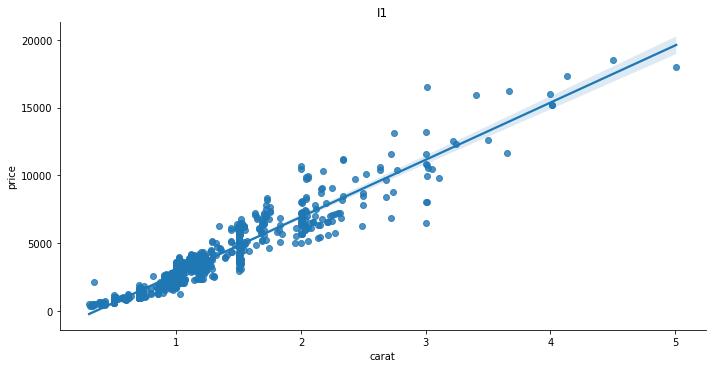

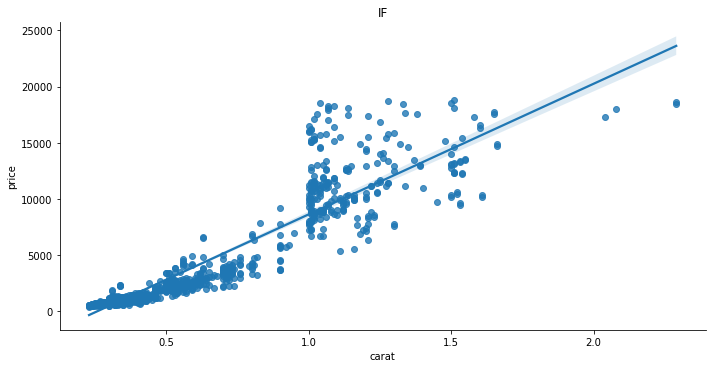

In [ ]:
for clarity in dfv3['clarity'].unique():
    sns.lmplot(data=dfv3[dfv3['clarity']==clarity], x='carat', y='price', height=5,aspect=2)
    plt.title(f'{clarity}')
    plt.show()

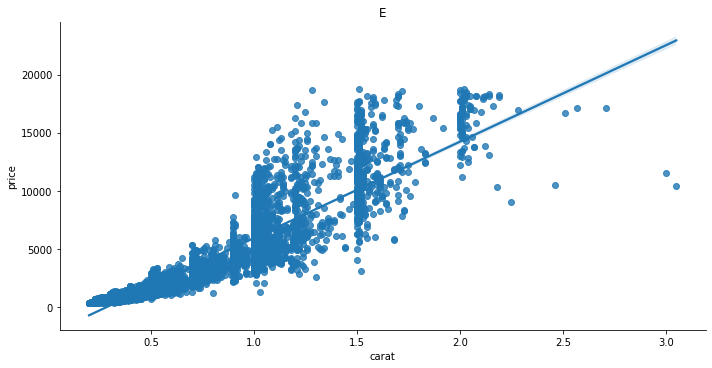

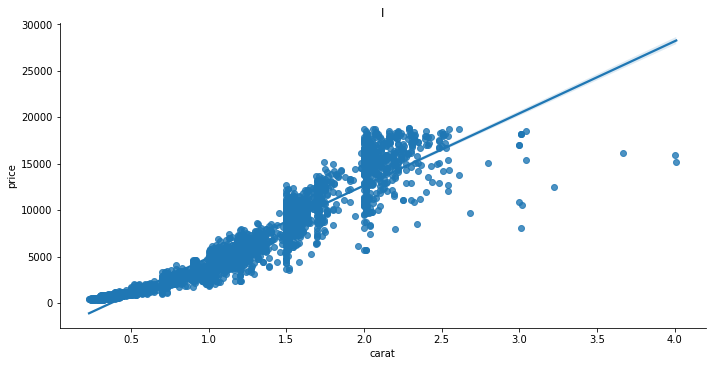

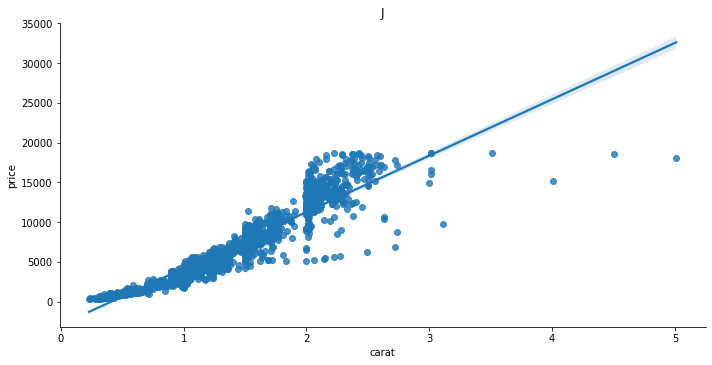

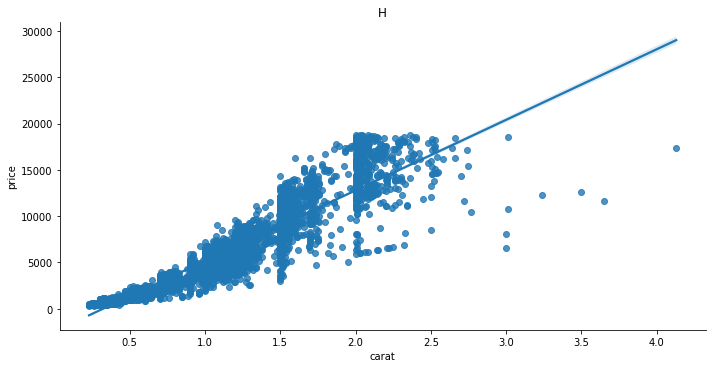

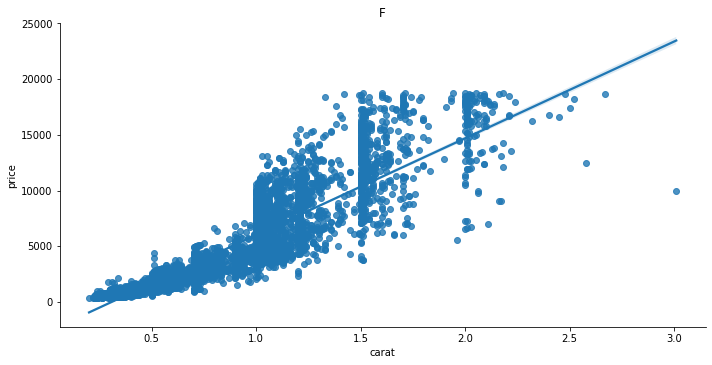

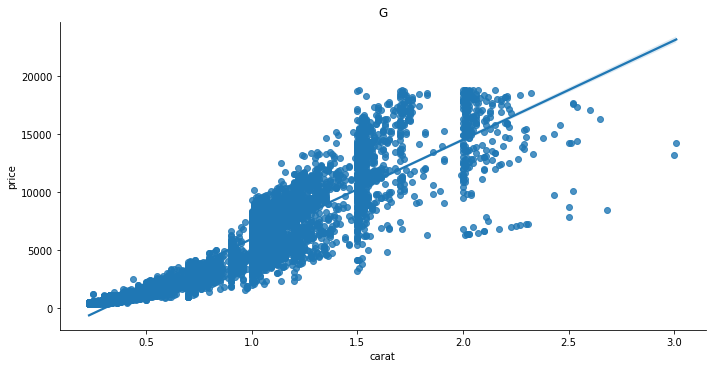

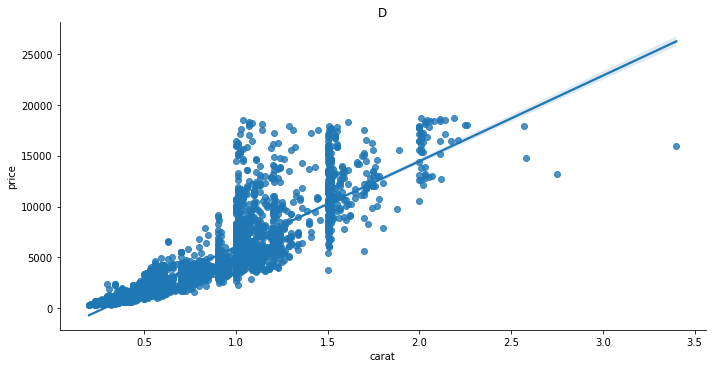

In [ ]:
for color in dfv3['color'].unique():
    sns.lmplot(data=dfv3[dfv3['color']==color], x='carat', y='price', height=5,aspect=2)
    plt.title(f'{color}')
    plt.show()

<span style="color:blue">
    <font size='3'>
        
- Initially, it may seem that there is a quadratic relationtship between caret and price. However, upon further investigation on the relationship, it is evident that the relationship is linear; however, some outliers do exist.
    </font></span>

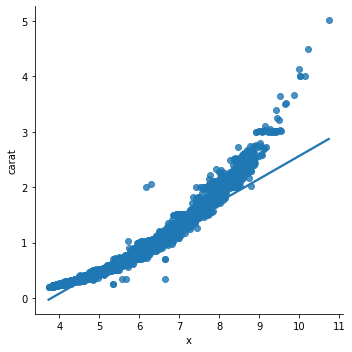

In [ ]:
sns.lmplot(data=dfv3, x='x', y='carat')
plt.show()

<span style="color:blue">
<font size='3'>
    
- There is a strong positive correlation between price and all of carat, x, y and z.
    
- To avoid multi-collinearity, the regression analysis will be conducted between price and carat.
</font></span>

## Regression Model:

In [ ]:
dfv3['intercept'] = 1
lm = sm.OLS(dfv3['price'], dfv3[['intercept','carat']])
results = lm.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.028e+05
Date:                Fri, 28 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:01:22   Log-Likelihood:            -4.7112e+05
No. Observations:               53760   AIC:                         9.422e+05
Df Residuals:                   53758   BIC:                         9.423e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2260.1225     13.082   -172.769      0.000   -2285.763   -2234.482
carat       7763.3664     14.107    550.303      0.000    7735.716    7791.017
==============================================================================
Omnibus:                    13941.419   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153218.282
Skew:                           0.934   Prob(JB):                         0.00
Kurtosis:                      11.057   Cond. No.                         3.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
dfv3['carat_squared'] = dfv3['carat']*dfv3['carat']

In [ ]:
dfv3['intercept'] = 1
lm = sm.OLS(dfv3['price'], dfv3[['intercept','carat','carat_squared']])
results = lm.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.534e+05
Date:                Fri, 28 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:01:23   Log-Likelihood:            -4.7082e+05
No. Observations:               53760   AIC:                         9.416e+05
Df Residuals:                   53757   BIC:                         9.417e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept     -1830.5145     21.739    -84.203      0.000   -1873.123   -1787.906
carat          6668.0494     46.570    143.182      0.000    6576.771    6759.328
carat_squared   516.2434     20.930     24.665      0.000     475.220     557.266
==============================================================================
Omnibus:                    14028.492   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           349515.883
Skew:                           0.693   Prob(JB):                         0.00
Kurtosis:                      15.414   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm = sm.OLS(dfv3['price'], dfv3[['intercept','carat']])
results = lm.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.028e+05
Date:                Fri, 28 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:39:12   Log-Likelihood:            -4.7112e+05
No. Observations:               53760   AIC:                         9.422e+05
Df Residuals:                   53758   BIC:                         9.423e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2260.1225     13.082   -172.769      0.000   -2285.763   -2234.482
carat       7763.3664     14.107    550.303      0.000    7735.716    7791.017
==============================================================================
Omnibus:                    13941.419   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153218.282
Skew:                           0.934   Prob(JB):                         0.00
Kurtosis:                      11.057   Cond. No.                         3.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="color:blue">
    <font size='3'>
        
- Carat explains change in price by 85.1% give the $R^{2}$ of the model
        
- Given that P value is zero indicates that there is a significant relationship between carat and price. For every 1 increase in carat, price changes by 6668.
    </font></span>

In [ ]:
lm = sm.OLS(dfv3['carat'],dfv3[['intercept','x']])
results = lm.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  carat   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 1.174e+06
Date:                Fri, 28 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:01:23   Log-Likelihood:                 48038.
No. Observations:               53760   AIC:                        -9.607e+04
Df Residuals:                   53758   BIC:                        -9.606e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.5732      0.002   -705.663      0.000      -1.578      -1.569
x              0.4136      0.000   1083.450      0.000       0.413       0.414
==============================================================================
Omnibus:                    29545.933   Durbin-Watson:                   0.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           667001.321
Skew:                           2.182   Prob(JB):                         0.00
Kurtosis:                      19.695   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="color:blue">
    <font size='3'>
        
- x explains change in carat by 95.6% given the $R^{2}$ of the model
        
- Given that P value is zero indicates that there is a significant relationship between x and carat. For every 1 increase in x, carat changes by 0.41.
    </font></span>

# Conclusion

<span style='color:blue'>
    <font size='3'>
        
- On average the depth of a diamond is around 62mm.<br>
- The table of a diamond ranges from 56-57.5mm.<br>
- The most sold cut is Ideal followed by Premium and Very Good.<br>  
- The least sold colors of diamonds are the J and I color.<br>
- The least sold clarity of diamonds are IF and I1 noting that the data for clarity is normally distrbuted among the rank of clarity.<br>
- Change in price of a diamond is mainly motivated with an $R^{2}$ of 85.1% by carat weight of the diamond.<br>
- Accordingly, the change in the carat of the diamond is mainly motivated by the dimensions of a diamond(x,y and z) with an $R^{2}$ of 95.6%     
    </font></span>


In [ ]:
dfv3[dfv3['price']>dfv3[dfv3['cut']=='Ideal'].loc[:,['price']].mean()[0]].loc[:,['cut','price','carat']]

,cut,price,carat
3780,Ideal,3463,0.73
3781,Very Good,3463,0.91
3782,Ideal,3463,0.73
3783,Good,3463,0.70
3784,Very Good,3464,0.71
...,...,...,...
27678,Very Good,18803,2.00
27679,Ideal,18804,2.07
27680,Ideal,18806,1.51
27681,Very Good,18818,2.00


In [ ]:
dfv3.groupby('carat').mean()[['price']].sort_values('carat',ascending=False).loc[[1.00,2.00,3.00,4.00],:]

,price
carat,
1.0,5250.869819
2.0,14110.240458
3.0,12378.500000
4.0,15984.000000


In [ ]:
dfv3[dfv3['carat'] == 1.01]

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_numerical,color_numerical,clarity_numerical,checker,intercept,carat_squared
215,1.01,Premium,F,I1,61.799999,60.0,2781,6.39,6.36,3.94,4,5,1,True,1,1.0201
241,1.01,Fair,E,I1,64.500000,58.0,2788,6.29,6.21,4.03,1,6,1,True,1,1.0201
242,1.01,Premium,H,SI2,62.700001,59.0,2788,6.31,6.22,3.93,4,3,2,True,1,1.0201
298,1.01,Fair,E,SI2,67.400002,60.0,2797,6.19,6.05,4.13,1,6,2,True,1,1.0201
542,1.01,Premium,H,SI2,61.599998,61.0,2828,6.39,6.31,3.91,4,3,2,True,1,1.0201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52885,1.01,Premium,J,I1,60.700001,59.0,2602,6.42,6.39,3.89,4,1,1,True,1,1.0201
53348,1.01,Premium,J,SI2,58.299999,62.0,2683,6.49,6.43,3.77,4,1,2,True,1,1.0201
53349,1.01,Fair,J,SI2,66.900002,58.0,2683,6.13,6.07,4.08,1,1,2,True,1,1.0201
53352,1.01,Premium,J,SI2,59.299999,56.0,2683,6.51,6.45,3.84,4,1,2,True,1,1.0201


In [ ]:
dfv3[dfv3['carat'] == 1.01].describe()

,carat,depth,table,price,x,y,z,cut_numerical,color_numerical,clarity_numerical,intercept,carat_squared
count,2238.00,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.0,2238.0000
mean,1.01,62.020374,58.191780,5508.982127,6.405331,6.404115,3.971220,3.377569,4.599643,3.517426,1.0,1.0201
std,0.00,1.686409,2.135036,1676.670188,0.093553,0.099003,0.062767,1.144452,1.554160,1.387540,0.0,0.0000
min,1.01,55.200001,52.000000,2017.000000,6.000000,5.940000,3.680000,1.000000,1.000000,1.000000,1.0,1.0201
25%,1.01,61.025000,57.000000,4355.000000,6.350000,6.350000,3.940000,3.000000,4.000000,2.000000,1.0,1.0201
50%,1.01,62.200001,58.000000,5093.000000,6.400000,6.400000,3.980000,3.000000,5.000000,3.000000,1.0,1.0201
75%,1.01,63.099998,59.000000,6335.000000,6.460000,6.470000,4.010000,4.000000,6.000000,4.000000,1.0,1.0201
max,1.01,69.500000,68.000000,16234.000000,6.780000,6.700000,4.200000,5.000000,7.000000,8.000000,1.0,1.0201


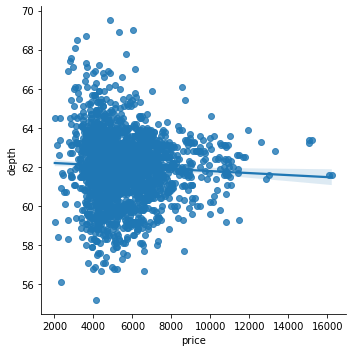

In [ ]:
sns.lmplot(data=dfv3[dfv3['carat'] == 1.01], x='price', y='depth')
plt.show()

In [ ]:
dfv3[dfv3['cut'] == 'Premium'].describe().loc[['min','max'],['depth','table']]

,depth,table
min,58.0,51.0
max,63.0,62.0


In [ ]:
dfv3[dfv3['cut'] == 'Ideal'].describe().loc[['min','max'],['depth','table']]

,depth,table
min,58.000000,43.0
max,66.699997,63.0


In [ ]:
dfv3[dfv3['cut'] == 'Fair'].describe().loc[['min','max'],['depth','table']]

,depth,table
min,52.200001,49.0
max,78.199997,70.0


In [ ]:
dfv3[dfv3['cut'] == 'Good'].describe().loc[['min','max'],['depth','table']]

,depth,table
min,54.299999,51.0
max,67.000000,66.0


In [ ]:
df.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
47680,0.51,Ideal,D,VS2,62.7,55.0,1882,5.12,5.09,3.20
51795,0.70,Premium,E,VS2,63.0,61.0,2415,5.64,5.51,3.51
42747,0.51,Premium,G,VS2,61.3,59.0,1343,5.11,5.17,3.15
246,0.76,Premium,E,SI1,61.8,58.0,2789,5.82,5.86,3.61
41192,0.48,Ideal,I,IF,61.4,55.0,1202,5.05,5.08,3.11
3419,0.36,Premium,H,VS2,60.9,59.0,568,4.58,4.62,2.80
48724,0.52,Ideal,G,VVS2,62.4,55.0,2012,5.19,5.17,3.23
43031,0.50,Fair,G,VS1,65.9,57.0,1373,5.00,4.87,3.25
2023,0.90,Very Good,H,SI2,61.1,63.0,3105,6.19,6.12,3.76
42257,0.46,Premium,E,VS1,62.0,58.0,1294,4.95,4.98,3.08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
